In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn import ensemble, metrics
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [34]:
dataset = pd.read_csv('input/train_finalamend.csv')


In [35]:
dataset.head()

,Date,sp_Open,sp_Close,nd_Open,nd_Close,dj_Open,dj_Close,ph_Open,ph_Close,label
0,2001-01-02,1320.28,1283.27,2474.16,2291.86,10790.92,10646.15,576.61,570.34,1
1,2001-01-03,1283.27,1347.56,2254.56,2616.69,10637.42,10945.75,570.34,670.23,1
2,2001-01-04,1347.56,1333.34,2593.96,2566.83,10944.94,10912.41,670.23,653.80,1
3,2001-01-05,1333.34,1298.35,2573.11,2407.65,10912.81,10662.01,653.80,617.49,1
4,2001-01-08,1298.35,1295.86,2388.72,2395.92,10658.73,10621.35,617.49,634.21,1


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5000 non-null   object 
 1   sp_Open   5000 non-null   float64
 2   sp_Close  5000 non-null   float64
 3   nd_Open   5000 non-null   float64
 4   nd_Close  5000 non-null   float64
 5   dj_Open   5000 non-null   float64
 6   dj_Close  5000 non-null   float64
 7   ph_Open   5000 non-null   float64
 8   ph_Close  5000 non-null   float64
 9   label     5000 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [37]:
# change type to datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [38]:
dataset.shape


(5000, 10)

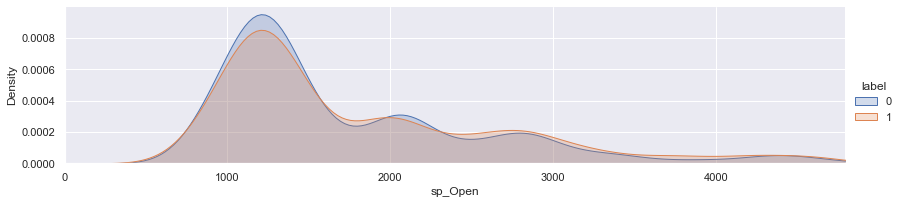

In [39]:
# features / label
facet = sns.FacetGrid(dataset, hue="label",aspect=4)
facet.map(sns.kdeplot,'sp_Open',shade= True)
facet.set(xlim=(0, dataset['sp_Open'].max()))
facet.add_legend()
 
plt.show()

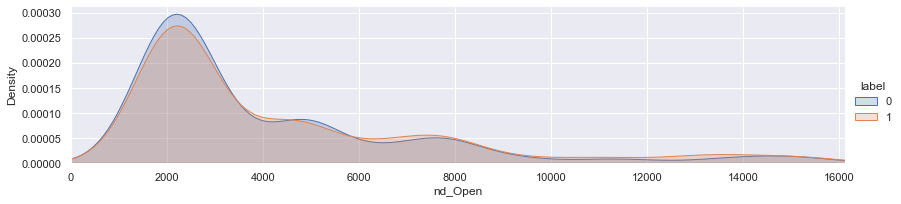

In [40]:
# features / label
facet = sns.FacetGrid(dataset, hue="label",aspect=4)
facet.map(sns.kdeplot,'nd_Open',shade= True)
facet.set(xlim=(0, dataset['nd_Open'].max()))
facet.add_legend()
 
plt.show()

In [41]:
#設定預測目標變數與解釋變數
dataset_data = dataset.drop('label', axis = 1)

label = dataset['label']

In [42]:
#feature標準化
minmax_scale = preprocessing.MinMaxScaler(feature_range = (0,1))
scaledFeatures = minmax_scale.fit_transform(dataset_data2)

scaledFeatures2 = pd.DataFrame(scaledFeatures)

In [43]:
kfold = KFold(n_splits = 20, shuffle = True)
predicted = []
expected = []

# # training model _ random forest

for train, test in kfold.split(scaledFeatures2):
    x_train = scaledFeatures2.iloc[train]
    y_train = label.iloc[train]
    x_test = scaledFeatures2.iloc[test]
    y_test = label.iloc[test]
    forest = ensemble.RandomForestClassifier(n_estimators= 250, max_depth=8)
    forest = forest.fit(x_train,y_train)
    expected.extend(y_test)
    predicted.extend(forest.predict(x_test))

In [44]:
print("Macro-average: {0}".format(metrics.f1_score(expected,predicted,average='macro')))
print("Micro-average: {0}".format(metrics.f1_score(expected,predicted,average='micro')))
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected, predicted))
accuracy = accuracy_score(expected, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print("Average = macro")
print('precision:',metrics.precision_score(expected, predicted,average='macro')) 
print('recall:',metrics.recall_score(expected, predicted,average='macro'))
print('F1-score:',metrics.f1_score(expected, predicted,labels=[0,1],average='macro'))

print("\n")
print("Average = micro")
print('precision:', metrics.precision_score(expected, predicted, average='micro')) 
print('recall:',metrics.recall_score(expected, predicted,average='micro'))
print('F1-score:',metrics.f1_score(expected, predicted,labels=[0,1],average='micro'))

print("\n")
print("Average = weighted")
print('precision:', metrics.precision_score(expected, predicted, average='weighted'))
print('recall:',metrics.recall_score(expected, predicted,average='weighted'))
print('F1-score:',metrics.f1_score(expected,predicted,labels=[0,1],average='weighted'))


Macro-average: 0.542566581627218
Micro-average: 0.6058
              precision    recall  f1-score   support

           0       0.65      0.26      0.37      2241
           1       0.60      0.89      0.71      2759

    accuracy                           0.61      5000
   macro avg       0.62      0.57      0.54      5000
weighted avg       0.62      0.61      0.56      5000

[[ 585 1656]
 [ 315 2444]]
Accuracy: 60.58%
Average = macro
precision: 0.6230487804878049
recall: 0.5734361876647583
F1-score: 0.542566581627218


Average = micro
precision: 0.6058
recall: 0.6058
F1-score: 0.6058


Average = weighted
precision: 0.6202566341463415
recall: 0.6058
F1-score: 0.5601862216041417


In [45]:
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

In [46]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(forest,parameters,cv=5)
cv.fit(scaledFeatures2, label.values.ravel())

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, n_estimators=250),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [47]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [27]:
display(cv)

Best parameters are: {'max_depth': 2, 'n_estimators': 5}


0.513 + or -0.047 for the {'max_depth': 2, 'n_estimators': 5}
0.476 + or -0.063 for the {'max_depth': 2, 'n_estimators': 10}
0.502 + or -0.062 for the {'max_depth': 2, 'n_estimators': 50}
0.502 + or -0.061 for the {'max_depth': 2, 'n_estimators': 100}
0.501 + or -0.062 for the {'max_depth': 2, 'n_estimators': 250}
0.462 + or -0.045 for the {'max_depth': 4, 'n_estimators': 5}
0.451 + or -0.051 for the {'max_depth': 4, 'n_estimators': 10}
0.456 + or -0.048 for the {'max_depth': 4, 'n_estimators': 50}
0.448 + or -0.052 for the {'max_depth': 4, 'n_estimators': 100}
0.452 + or -0.051 for the {'max_depth': 4, 'n_estimators': 250}
0.434 + or -0.066 for the {'max_depth': 8, 'n_estimators': 5}
0.434 + or -0.063 for the {'max_depth': 8, 'n_estimators': 10}
0.44 + or -0.056 for the {'max_depth': 8, 'n_estimators': 50}
0.438 + or -0.057 for the {'max_depth': 8, 'n_estimators': 100}
0.44 + or -0.056 for the {'max_depth': 8, 'n_estimators': 

In [28]:
forest.feature_importances_ 

array([0.1298997 , 0.132028  , 0.11857487, 0.12037718, 0.12283175,
       0.12511518, 0.12966244, 0.12151088])

In [31]:
testset = pd.read_csv('input/sp500_data_test.csv')
testset = testset.drop('Date', axis=1)

In [32]:
result = forest.predict(testset)
result

/Users/sean/opt/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])